In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data=r'original_dataset\dataset_traffic_accident_prediction1.csv'
df = pd.read_csv(data)
plt_df=pd.read_csv(data)
df.sample(5)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
508,Clear,Rural Road,Evening,1.0,80.0,5.0,0.0,Moderate,Wet,NaN,36.0,28.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
560,Rainy,Highway,Afternoon,0.0,60.0,1.0,NaN,Low,Under Construction,NaN,34.0,30.0,Daylight,0.0
13,Rainy,City Road,Night,0.0,30.0,1.0,1.0,Moderate,NaN,Motorcycle,67.0,63.0,Artificial Light,1.0
66,Foggy,Rural Road,Morning,0.0,80.0,4.0,0.0,Low,Dry,Motorcycle,40.0,32.0,Daylight,0.0


In [3]:
df.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.784894,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


In [4]:
df.columns

Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')

In [5]:
cat_col = df.select_dtypes(include='object').columns
for col in cat_col:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Weather: ['Rainy' 'Clear' 'Foggy' 'Stormy' nan 'Snowy']
Unique values in Road_Type: ['City Road' 'Rural Road' 'Highway' nan 'Mountain Road']
Unique values in Time_of_Day: ['Morning' 'Night' 'Evening' 'Afternoon' nan]
Unique values in Accident_Severity: [nan 'Moderate' 'Low' 'High']
Unique values in Road_Condition: ['Wet' 'Icy' 'Under Construction' 'Dry' nan]
Unique values in Vehicle_Type: ['Car' 'Truck' 'Bus' 'Motorcycle' nan]
Unique values in Road_Light_Condition: ['Artificial Light' 'Daylight' 'No Light' nan]


In [6]:
for value in cat_col:
    df[value] = df[value].fillna(df[value].mode()[0])

In [7]:
num_col = df.select_dtypes(exclude='object').columns
for col in num_col:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Traffic_Density: [ 1. nan  2.  0.]
Unique values in Speed_Limit: [100. 120.  60. 195.  30.  nan  50.  80. 200. 206. 178. 208. 213. 190.
 196. 188. 194. 189. 193. 185. 199. 192. 198. 212. 181.]
Unique values in Number_of_Vehicles: [ 5.  3.  4. 11.  2.  1. nan 12. 13. 14. 10.]
Unique values in Driver_Alcohol: [ 0.  1. nan]
Unique values in Driver_Age: [51. 49. 54. 34. 62. 27. 29. 38. 50. 33. 47. 25. 67. 61. 46. 48. 53. 35.
 59. 32. 69. 68. 28. 40. 30. 60. 66. nan 63. 65. 18. 55. 45. 22. 26. 58.
 23. 57. 43. 41. 64. 42. 56. 52. 44. 20. 24. 19. 37. 21. 39. 36. 31.]
Unique values in Driver_Experience: [48. 43. 52. 31. 55. 26. 22. 29. 28. 38. 16. 63. 57. nan 41. 32. 53. 23.
 24. 47. 64. 60. 25. 65. 13. 36. 37. 21. 54. 14. 19. 49. 39. 58. 66. 17.
 59. 42. 46. 18. 61. 30. 51. 56. 34. 10. 27. 50. 33. 20. 67. 69. 40. 62.
 44. 12. 45. 15. 35. 11.  9.]
Unique values in Accident: [ 0.  1. nan]


In [8]:
for value in num_col:
    df[value] = df[value].fillna(df[value].mode()[0])

C:\Users\96176\AppData\Local\Temp\ipykernel_18584\1843683259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x="Weather" , y="Traffic_Density", kind="bar" , palette="Set1")


<Figure size 1000x800 with 0 Axes>

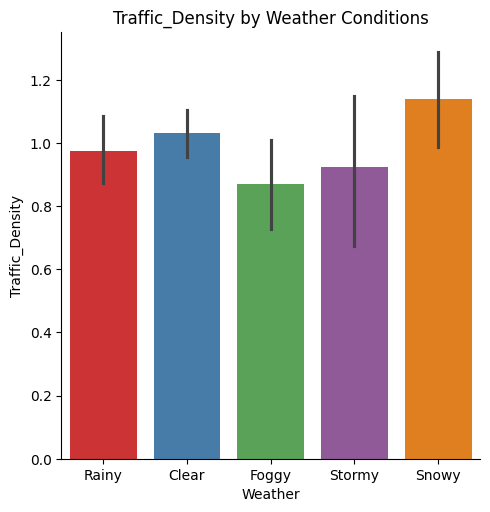

In [9]:
plt.figure(figsize=(10, 8))
sns.catplot(data=df, x="Weather" , y="Traffic_Density", kind="bar" , palette="Set1")
plt.title("Traffic_Density by Weather Conditions")
plt.xlabel("Weather")
plt.ylabel("Traffic_Density")
plt.show()

C:\Users\96176\AppData\Local\Temp\ipykernel_18584\1934723958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x="Road_Type" , y="Number_of_Vehicles", kind="violin" , palette="Set1")


<Figure size 1000x800 with 0 Axes>

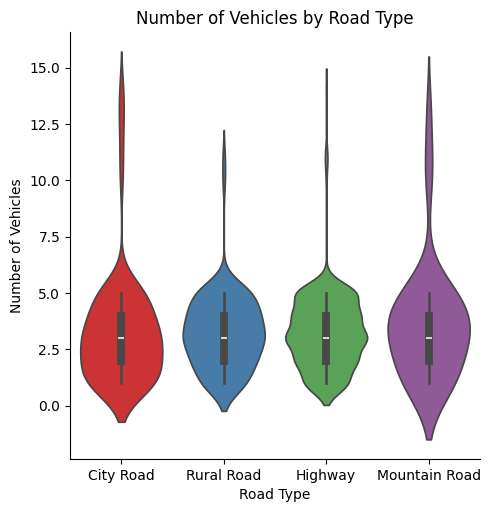

In [10]:
plt.figure(figsize=(10, 8))
sns.catplot(data=df, x="Road_Type" , y="Number_of_Vehicles", kind="violin" , palette="Set1")
plt.title("Number of Vehicles by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Vehicles")
plt.show()

C:\Users\96176\AppData\Local\Temp\ipykernel_18584\1782738742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x="Time_of_Day" , y="Speed_Limit", kind="boxen" , palette="Set1")


<Figure size 1000x800 with 0 Axes>

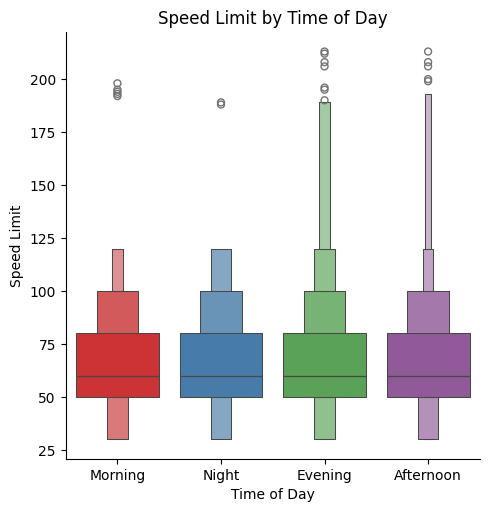

In [11]:
plt.figure(figsize=(10, 8))
sns.catplot(data=df, x="Time_of_Day" , y="Speed_Limit", kind="boxen" , palette="Set1")
plt.title("Speed Limit by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Speed Limit")
plt.show()

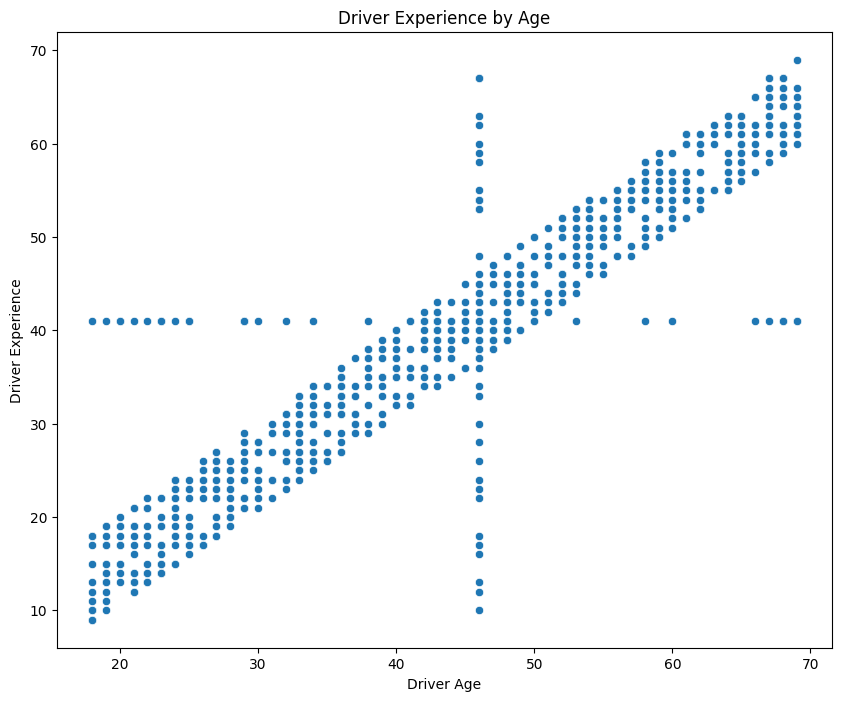

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Driver_Age" , y="Driver_Experience")
plt.title("Driver Experience by Age")
plt.xlabel("Driver Age")
plt.ylabel("Driver Experience")
plt.show()


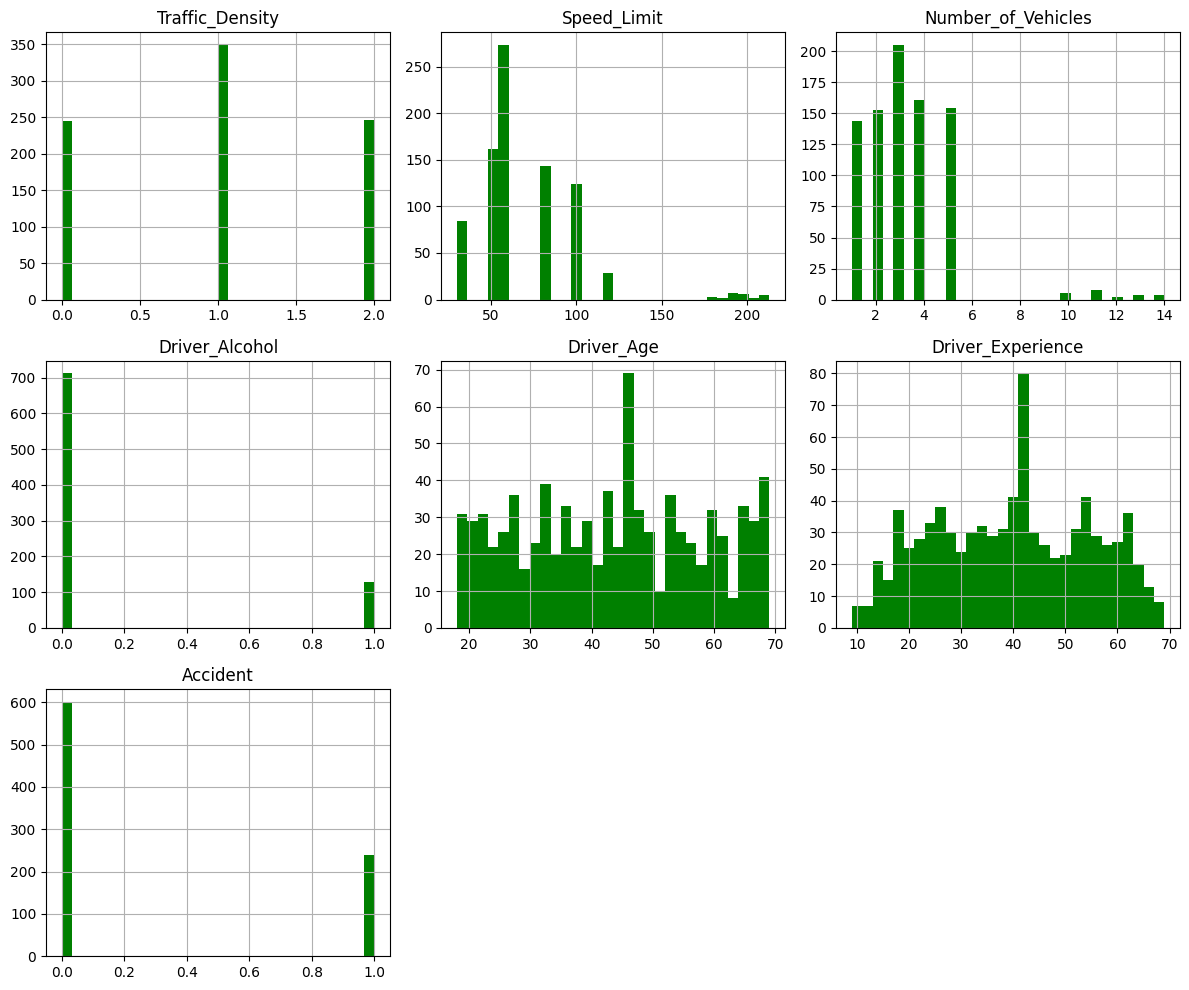

In [13]:
df[num_col].hist(bins=30, figsize=(12,10), color='g')
plt.tight_layout()
plt.show()

np.log1p:
 It is particularly useful for transforming data that may contain zero or negative values

In [14]:
df['Speed_Limit'] = np.log1p(df['Speed_Limit'])

In [15]:
le = LabelEncoder()
df[cat_col] = df[cat_col].apply(le.fit_transform)

In [16]:
df.isna().sum()

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

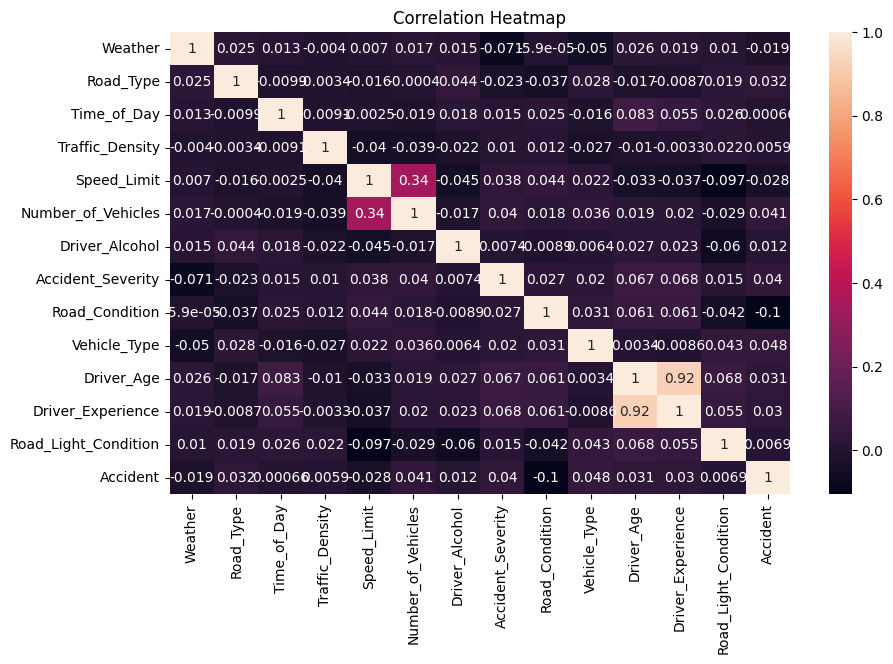

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
threshold = 0.02

correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["Accident_Severity"]) > threshold].tolist()
high_corr_features.remove("Accident_Severity")
print(high_corr_features)

X_selected = df[high_corr_features]
Y = df["Accident_Severity"]

['Weather', 'Road_Type', 'Speed_Limit', 'Number_of_Vehicles', 'Road_Condition', 'Driver_Age', 'Driver_Experience', 'Accident']


In [19]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, Y)

In [20]:

test1 = pd.DataFrame(X_resampled)

y_resampled = pd.DataFrame(y_resampled)
combined_df = pd.concat([X_resampled, y_resampled], axis=1)

combined_df.to_csv('combined_data.csv', index=False)
print(combined_df)

      Weather  Road_Type  Speed_Limit  Number_of_Vehicles  Road_Condition  \
0           2          0     4.615121            5.000000               3   
1           0          3     4.795791            3.000000               3   
2           2          1     4.110874            4.000000               1   
3           0          0     4.110874            3.000000               2   
4           2          1     5.278115           11.000000               0   
...       ...        ...          ...                 ...             ...   
1555        0          1     4.110874            2.785979               1   
1556        0          0     4.346004            3.341672               0   
1557        0          1     4.110874            3.569081               2   
1558        1          0     5.208747           10.618929               0   
1559        0          1     3.948860            4.963178               0   

      Driver_Age  Driver_Experience  Accident  Accident_Severity  
0      5

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [22]:
#X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

In [28]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=2, max_depth=None, random_state=42 , criterion='gini')
model.fit(X_train, y_train)

c:\Users\96176\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [29]:
y_pred = model.predict(X_test)

In [30]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.75
[[84 10  2]
 [ 7 81 23]
 [ 8 28 69]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        96
           1       0.68      0.73      0.70       111
           2       0.73      0.66      0.69       105

    accuracy                           0.75       312
   macro avg       0.75      0.75      0.75       312
weighted avg       0.75      0.75      0.75       312



In [27]:

param_grid = {
    'n_estimators': [100, 200, 270],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'criterion':['entropy','gini']
}

# %%
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)


c:\Users\96176\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\96176\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\96176\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\96176\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConvers

Best parameters from Grid Search: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
